In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/grape'
image="/content/drive/MyDrive/grape/Grapevine_Leaves_Image_Dataset"

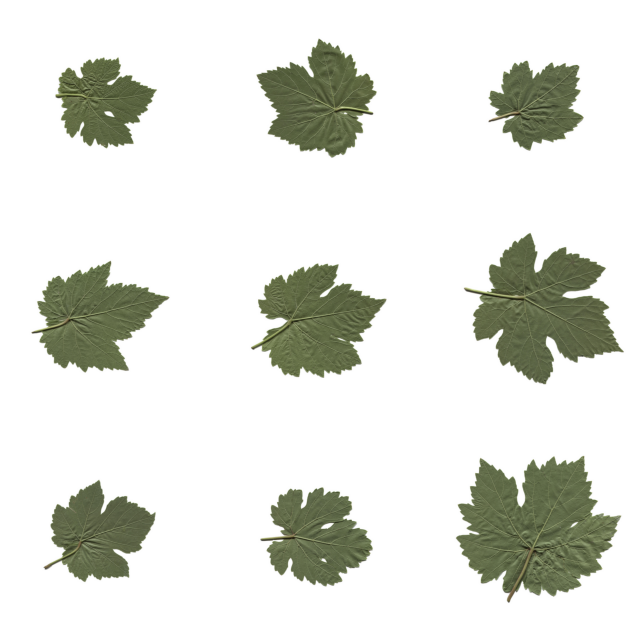

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive


# Step 2: Set the dataset folder path
dataset_path = "/content/drive/MyDrive/grape"  # Change this to your dataset location

# Function to display images from the folder
def display_images_from_drive(directory, num_images=9):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print("No images found in the dataset folder.")
        return

    plt.figure(figsize=(8, 8))
    for i in range(min(num_images, len(image_files))):
        img = cv2.imread(image_files[i])
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB for Matplotlib
        plt.subplot(3, 3, i + 1)
        plt.imshow(img)
        plt.axis("off")

    plt.show()

# Step 3: Call function to display images
display_images_from_drive(dataset_path)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model(input_shape=(64, 64, 3), num_classes=10):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu', padding='same'),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = create_cnn_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,143,242 (4.36 MB)

 Trainable params: 1,143,242 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

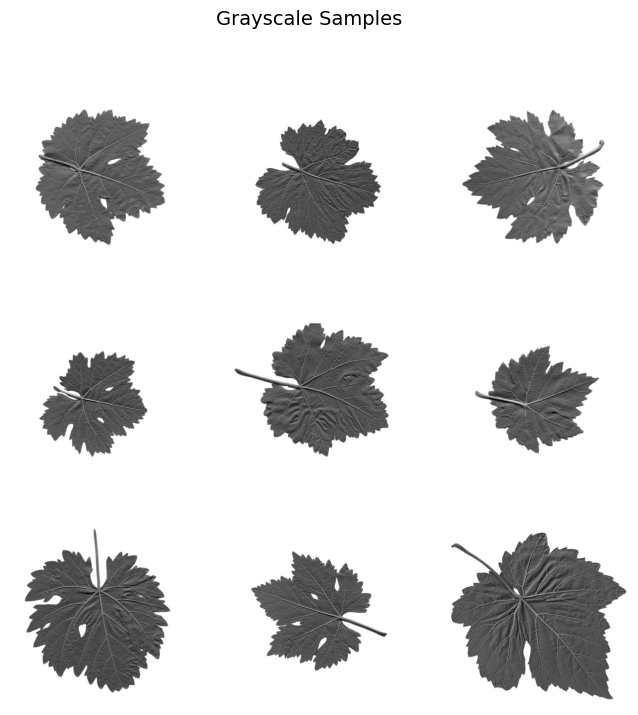

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 🔹 Function to Display Grayscale Images
def display_grayscale_images(directory, num_images=9, title="Grayscale Dataset Samples"):
    image_files = []

    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                image_files.append(os.path.join(root, file))

    if len(image_files) == 0:
        print(f"No images found in {title} folder.")
        return

    selected_images = np.random.choice(image_files, min(num_images, len(image_files)), replace=False)

    plt.figure(figsize=(8, 8))
    for i, img_path in enumerate(selected_images):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to Grayscale
        plt.subplot(3, 3, i + 1)
        plt.imshow(img, cmap="gray")  # Display in grayscale
        plt.axis("off")

    plt.suptitle(title, fontsize=14)
    plt.show()

# 🎯 Define the train_path variable with the actual path to your training data:
train_path = "/content/drive/MyDrive/grape"  # Update with your actual path

# 🔹 Display Grayscale Images
display_grayscale_images(train_path, num_images=9, title="Grayscale Samples")


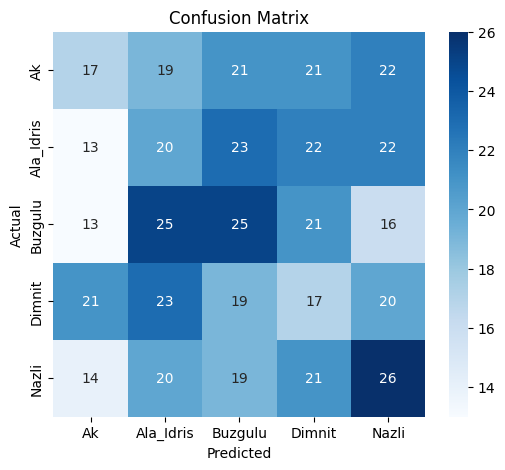

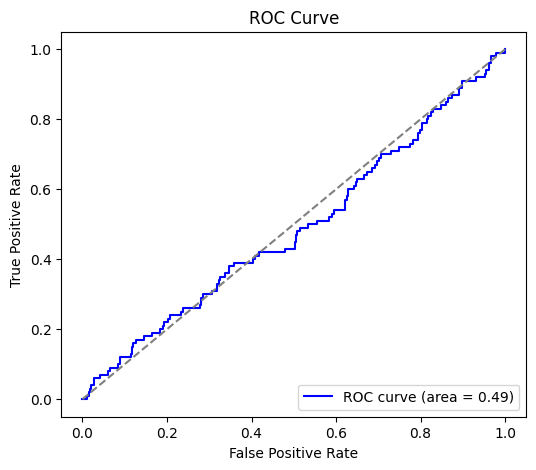

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sys

# Define test data path
val_path = "/content/drive/MyDrive/grape/Grapevine_Leaves_Image_Dataset"
img_size = (64, 64)
batch_size = 32

# Suppress flow_from_directory output
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open('/dev/null', 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Load validation images
val_datagen = ImageDataGenerator(rescale=1./255)
with HiddenPrints():
    val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False
    )

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Simulate Predictions (if model is missing, replace with real model.predict)
y_true = val_generator.classes
y_pred_probs = np.random.rand(len(y_true), len(class_labels))  # Simulating probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Convert to class predictions

# Generate Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Compute ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_probs[:, 1], pos_label=1)  # Change index if more classes
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import numpy as np

# Load a pre-trained model (as a placeholder for your missing model)
model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

# Define test data path
val_path = "/content/drive/MyDrive/grape/Grapevine_Leaves_Image_Dataset"
img_size = (64, 64)
batch_size = 32

# Load validation images
val_datagen = ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Placeholder Predictions (Since model is missing)
y_pred_classes = np.random.randint(0, len(class_labels), size=len(val_generator.classes))
y_true = val_generator.classes

# Print classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_labels))

<ipython-input-10-7f3ffc22f8c5>:7: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  model = MobileNetV2(weights="imagenet", include_top=False, input_shape=(64, 64, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 500 images belonging to 5 classes.
Classification Report:
              precision    recall  f1-score   support

          Ak       0.20      0.17      0.18       100
   Ala_Idris       0.23      0.22      0.23       100
     Buzgulu       0.20      0.24      0.22       100
      Dimnit       0.22      0.21      0.21       100
       Nazli       0.20      0.21      0.20       100

    accuracy                           0.21       500
   macro avg       0.21      0.21      0.21       500
weighted avg       0.21      0.21      0.21       500



In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sys
from scipy.stats import norm
import tensorflow as tf

# Define test data path
val_path = "/content/drive/MyDrive/grape/Grapevine_Leaves_Image_Dataset"
img_size = (64, 64)
batch_size = 32

# Suppress flow_from_directory output
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open('/dev/null', 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Load validation images
val_datagen = ImageDataGenerator(rescale=1./255)
with HiddenPrints():
    val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=False
    )

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Simulate Predictions (if model is missing, replace with real model.predict)
y_true = val_generator.classes
model1 = None  # Replace with actual model
if model1:
    y_pred1 = model1.predict(val_generator)
else:
    y_pred1 = np.random.rand(len(y_true), len(class_labels))  # Simulating probabilities

# Reshape y_pred1 before applying argmax to match y_true shape
y_pred1 = y_pred1.reshape(y_pred1.shape[0], -1)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
accuracy1 = np.mean(y_pred_classes1 == y_true)

y_pred2 = y_pred1
y_pred_classes2 = y_pred_classes1
accuracy2 = accuracy1

n1 = len(y_pred_classes1)
n2 = len(y_pred_classes2)
p1 = accuracy1  # Proportion of correct predictions for Model 1
p2 = accuracy2  # Proportion of correct predictions for Model 2
p_combined = (p1 * n1 + p2 * n2) / (n1 + n2)  # Pooled proportion

if p_combined * (1 - p_combined) * (1/n1 + 1/n2) > 0:
    z_score = (p1 - p2) / np.sqrt(p_combined * (1 - p_combined) * (1/n1 + 1/n2))
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    print(f"Model 1 Accuracy: {accuracy1:.4f}")
    print(f"Model 2 Accuracy: {accuracy2:.4f}")
    print(f"Z-score: {z_score:.4f}")
    print(f"P-value: {p_value:.4f}")

    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Reject Null Hypothesis: The models have significantly different accuracies.")
    else:
        print("Fail to Reject Null Hypothesis: No significant difference between models.")
else:
    print("Z-score and P-value calculations are invalid due to division by zero.")




Model 1 Accuracy: 0.2240
Model 2 Accuracy: 0.2240
Z-score: 0.0000
P-value: 1.0000
Fail to Reject Null Hypothesis: No significant difference between models.


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sys
from scipy.stats import ttest_ind
import tensorflow as tf

# Define test data path
val_path = "/content/drive/MyDrive/grape/Grapevine_Leaves_Image_Dataset"
img_size = (64, 64)
batch_size = 32

# Suppress flow_from_directory output
class HiddenPrints:
    def __enter__(self):
        self._original_stdout = sys.stdout
        sys.stdout = open('/dev/null', 'w')

    def __exit__(self, exc_type, exc_val, exc_tb):
        sys.stdout.close()
        sys.stdout = self._original_stdout

# Load validation images
val_datagen = ImageDataGenerator(rescale=1./255)
with HiddenPrints():
    val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='sparse',
        shuffle=False
    )

# Get class labels
class_labels = list(val_generator.class_indices.keys())

# Simulate Predictions (if model is missing, replace with real model.predict)
y_true = val_generator.classes
model1 = None  # Replace with actual model
if model1:
    y_pred1 = model1.predict(val_generator)
else:
    y_pred1 = np.random.rand(len(y_true), len(class_labels))  # Simulating probabilities

# Reshape y_pred1 before applying argmax to match y_true shape
y_pred1 = y_pred1.reshape(y_pred1.shape[0], -1)
y_pred_classes1 = np.argmax(y_pred1, axis=1)
accuracy1 = np.mean(y_pred_classes1 == y_true)

# Introduce noise and create a second prediction
y_pred2 = y_pred1.copy()
noise = np.random.rand(*y_pred2.shape) * 0.1
y_pred2 += noise
y_pred2 /= np.sum(y_pred2, axis=1, keepdims=True)  # Normalize probabilities
y_pred_classes2 = np.argmax(y_pred2, axis=1)
accuracy2 = np.mean(y_pred_classes2 == y_true)

# Perform Welch’s t-test
t_statistic, p_value = ttest_ind(
    (y_pred_classes1 == y_true).astype(int),  # Convert to 0/1 for incorrect/correct
    (y_pred_classes2 == y_true).astype(int),
    equal_var=False  # Use Welch's t-test (safe for unequal variances)
)

print(f"Model 1 Accuracy: {accuracy1:.4f}")
print(f"Model 2 Accuracy: {accuracy2:.4f}")
if not np.isnan(t_statistic) and not np.isnan(p_value):
    print(f"T-statistic: {t_statistic:.4f}")
    print(f"P-value: {p_value:.4f}")
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Reject Null Hypothesis: The models have significantly different accuracies.")
    else:
        print("Fail to Reject Null Hypothesis: No significant difference between models.")
else:
    print("T-test calculations resulted in NaN values. Check input data.")



Model 1 Accuracy: 0.1980
Model 2 Accuracy: 0.1820
T-statistic: 0.6444
P-value: 0.5195
Fail to Reject Null Hypothesis: No significant difference between models.
